In [181]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

In [182]:
"""Original Images"""
import os
PATH = "test_images/"
test_imgs = os.listdir(PATH)
test_imgs

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

In [183]:
original_image_names = list(map(lambda name: PATH + name, test_imgs))

In [184]:
def show_image_list(original_images, cols=2, fig_size=(15, 15), img_labels=original_image_names, show_ticks=True):
    img_count = len(original_images)
    rows = img_count / cols
    cmap = None
    plt.figure(figsize=fig_size)
    for i in range(0, img_count):
        img_name = img_labels[i]
        
        plt.subplot(rows, cols, i+1)
        img = original_images[i]
        if len(img.shape) < 3:
            cmap = "gray"
        
        if not show_ticks:
            plt.xticks([])
            plt.yticks([])
            
        plt.title(img_name[len(test_imgs):])    
        plt.imshow(img, cmap=cmap)

    plt.tight_layout()
    plt.show()

In [185]:
original_images = list(map(lambda img_name: mpimg.imread(img_name), original_image_names))
print("Total image count: ", len(original_images))

Total image count:  6


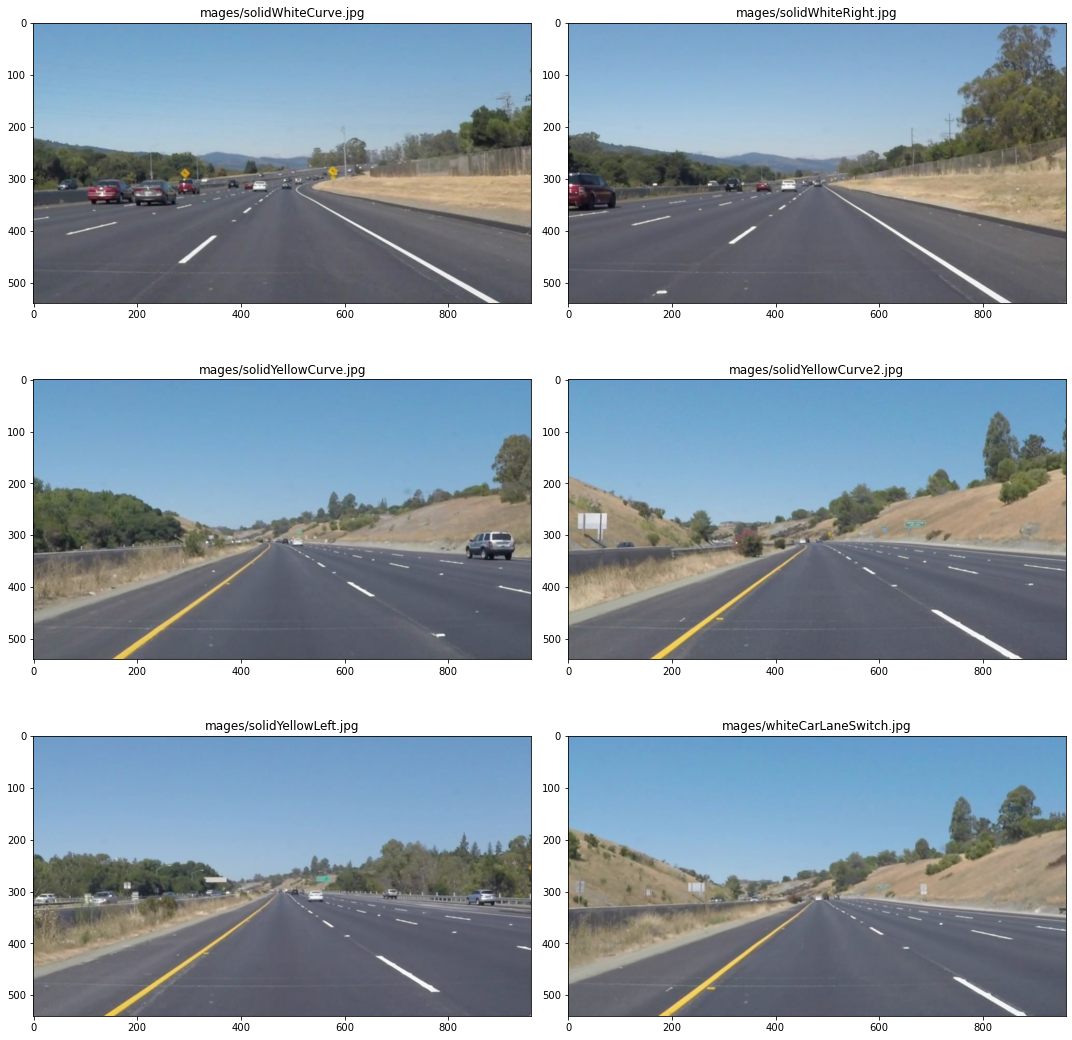

In [186]:
# allImages = show_image_list(image_list)
imshape = original_images[1].shape
show_image_list(original_images)
vertices = np.array([[(10,imshape[0]),(450,320),(480,320),(imshape[1],imshape[0])]],dtype=np.int32)
kernel_size = 5  
low_threshold = 10
high_threshold = 100
rho=2
theta = np.pi/180
threshold = 15
min_line_len = 40
max_line_gap = 20


In [187]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [188]:
def region_of_interest(img, vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


In [189]:
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

In [190]:
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)



In [191]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

In [192]:
def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

In [193]:
results_to_show = []

In [194]:
for image in original_images:
    
    gray = grayscale(image)
    polygon = region_of_interest(image,vertices)
    blur = gaussian_blur(gray,kernel_size)
    edgeDetection = canny(blur, low_threshold, high_threshold)
    houge = hough_lines(edgeDetection, rho, theta, threshold, min_line_len, max_line_gap)
    finalImage1 = region_of_interest(houge,vertices)
    weightedImage = weighted_img(finalImage1,image)
    
    
    results_to_show.append(weightedImage)
    

    


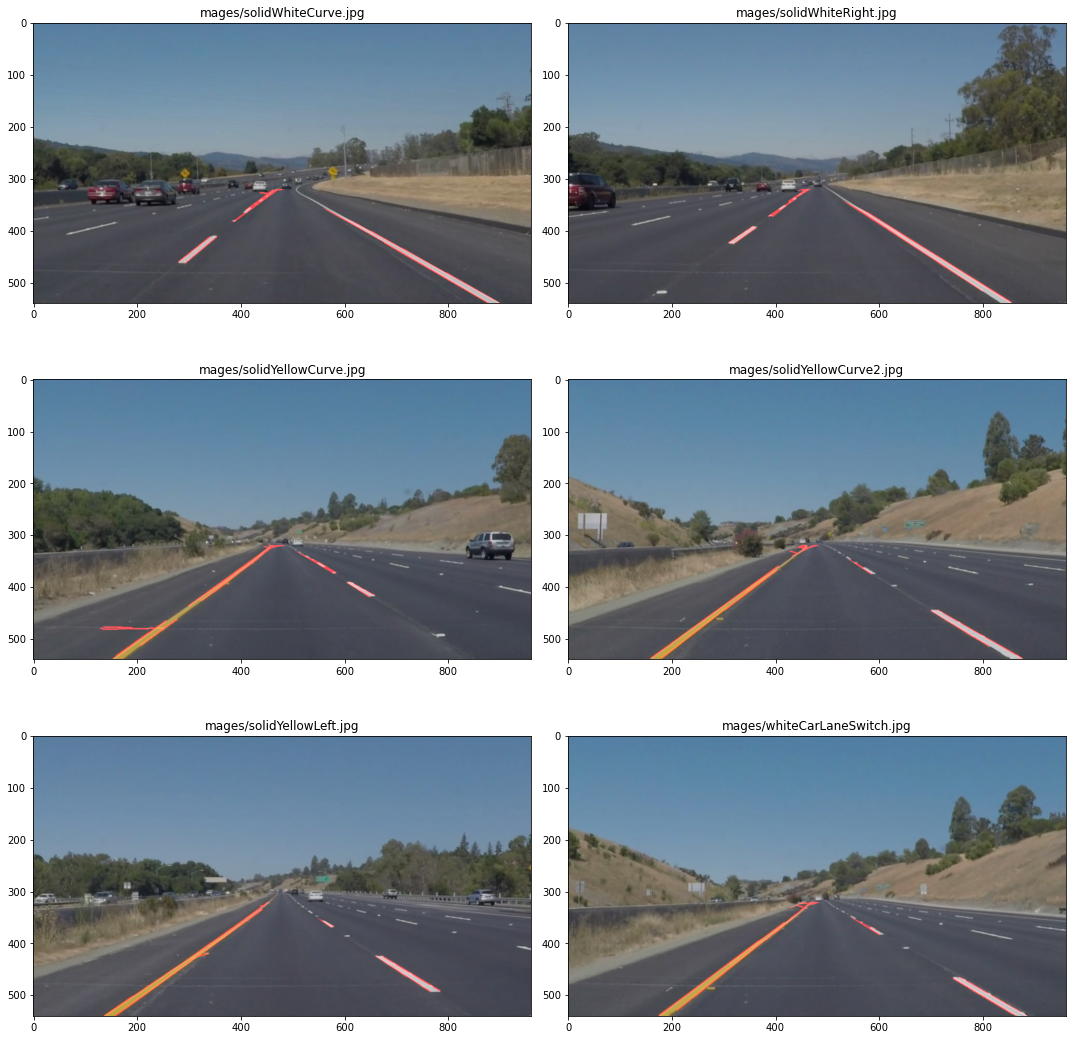

In [195]:
    
show_image_list(results_to_show)

In [113]:
# from PIL import Image
# def save_imgs(img_list, labels, prefix="Test", op_folder="test_imgs_output"):
#     if not os.path.exists(op_folder):
#         os.mkdir(op_folder)
#     for img, label in zip(img_list, labels):
#         PATH = op_folder + "/" + prefix + "_" + label
#         Image.fromarray(img).save(PATH)
        
        
# save_imgs(results_to_show,labels=[])

In [221]:
# # Import everything needed to edit/save/watch video clips

from moviepy.editor import VideoFileClip

from IPython.display import HTML

In [222]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    results_to_show = []
    for image in original_images:
    
        gray = grayscale(image)
        polygon = region_of_interest(image,vertices)
        blur = gaussian_blur(gray,kernel_size)
        edgeDetection = canny(blur, low_threshold, high_threshold)
        houge = hough_lines(edgeDetection, rho, theta, threshold, min_line_len, max_line_gap)
        finalImage1 = region_of_interest(houge,vertices)
        weightedImage = weighted_img(finalImage1,image)
        result = results_to_show
        results_to_show.append(weightedImage)

    return result

In [226]:
cap = cv2.VideoCapture("test_videos_output/solidWhiteRight.mp4")
while(cap.isOpened()):
    _, image = cap.read()
    video = process_image(image)
    cv2.imshow("result", video)



%time white_clip.write_videofile(video, audio=False)
    

NameError: name 'white_clip' is not defined

In [220]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
laneMem = LaneMemory()
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(laneMem.process) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

NameError: name 'deque' is not defined

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))